# PREDICTING CAR PRICES

# 1. INTRODUCTION

The goal of this project is to use the K Nearest neighbors algorithm to predict the market price of cars based on a number of attributes.

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

You can find the data set here :
[https://archive.ics.uci.edu/ml/datasets/automobile](https://archive.ics.uci.edu/ml/datasets/automobile)


In [1]:
### Importing the librairies we will be working with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
### Reading the data set
cars = pd.read_csv("imports-85.data")

In [3]:
### Displaying the first 10 rows
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We notice that the columns are not named (no header), we can get their names in the [dataset documentation](https://archive.ics.uci.edu/ml/datasets/automobile) and rename them.  

In [4]:
### Creating a list of the column names found in the dataset documentation
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
                'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
### Naming the columns 
cars = pd.read_csv("imports-85.data", names = column_names)

In [6]:
### Displaying the changes
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Choice of target and features : 
- Target : since we want to predict the price, our target column will be the price column.  


- Possible features : We can possibly use the following columns with continuous values as features. <br>
["normalized_losses", "wheel_base", "lenght", "width", "height","curb_weight", "engine_size", "bore","stroke", "compression_ratio", "horsepower","peak_rpm","city_mpg","highway_mpg"]

From now, we will only work with numeric columns. So lets create a subset of our dataset called "numeric_cars", containing only the numeric columns

In [7]:
### Creating a subset of the dataset containing only numeric columns with continuous values
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                   'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_columns]

In [8]:
### Displaying the top 10 rows
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,?


# 2. DATA CLEANING

## 2.1. Missing values

If we look closely the dataframe above, we can notice that null values are represented by the string "?". We will replace it with Nan values in order to be able to perform some operations.

In [9]:
### remplacing "?" with NaN values in the [normalized_losses column]
numeric_cars = numeric_cars.replace("?", np.nan)

In [10]:
### Displaying the changes
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,NaN


Now, lets look for the type of values in the numeric_cars dataset :  

In [11]:
### Displaying the type of values in each column and the count of non null values
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


From the table above, We can make two observations : <br>
- Value Type : some columns with numeric values are represented as object dtype -> Lets convert all the columns in float dtype to uniformize
- Missing values : there is some missing values in some columns(eg : "normalized_losses", "price"). We will investigate further. 

In [12]:
### Converting numeric columns in float dtype
numeric_cars = numeric_cars.astype(float)

In [13]:
### Displaying the changes
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


Now, that all the columns have been converted to float dtype, lets look closer for null values.

In [14]:
### Counting the number of null values for each column
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
### Calculating the percentage of null values in each column
(numeric_cars.isnull().sum()/len(cars))*100 

normalized-losses    20.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-size           0.00000
bore                  1.95122
stroke                1.95122
compression-rate      0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

For the nformation above, we take note that :
- normalized_losses has 19.60 % of null values
- bore has 1.96 % of null values
- stroke has 1.96 % of null values
- horsepower has 0.98 % of null values
- peak_rpm has 0.98 % of null values
- price has 1.96% of null values

normalized_losses has too much null values, 19.6 % is a lot!<br>
When dealing with missing values in a column, we have several options : 
- Replace the missing values using the average values from that column.
- Drop the rows entirely (especially if other columns in those rows have missing values).
- Drop the column entirely.

"normalized_losses", "bore", "stroke", "horsepower", "peak_rpm" can bring important and interesting information for our prediction. I prefer to avoid droping any value. Instead i will replace missing values with the average value of the given column.

Because "price" is ou target column i will delete rows with missing values in that column.

In [16]:
### Deleting rows with missing values in the "price" column
numeric_cars = numeric_cars.dropna(subset = ["price"])

In [17]:
### Replacing the null values in each column with the mean of the values in the given column
columns_mean = numeric_cars.mean()
numeric_cars = numeric_cars.fillna(columns_mean)

In [18]:
### Checking the changes 
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## 2.2. Features normalization

Now are data is purged of missing information we must normalise the data so that individual values do not over affect the results.
We will normalize all the numeric columns exact the target column, to make it easier to interpret the errors we will get from our predictions.

In [19]:
price_column = numeric_cars['price'] # Isolating the price column
numeric_cars = (numeric_cars - numeric_cars.mean())/(numeric_cars.std())
numeric_cars['price'] = price_column # assigning the price column back 

In [20]:
### Checking the changes 
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0
5,0.000000,0.165335,0.251498,0.195551,-0.272351,-0.094079,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,15250.0
6,1.125132,1.154395,1.501278,2.622423,0.789818,0.557385,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,17710.0
7,0.000000,1.154395,1.501278,2.622423,0.789818,0.770029,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,18920.0
8,1.125132,1.154395,1.501278,2.622423,0.871523,1.025201,0.099271,-0.748720,0.452769,-0.465492,0.979591,0.799836,-1.273365,-1.568060,23875.0
10,2.187756,0.396116,0.210921,-0.518235,0.217881,-0.310589,-0.454322,0.631507,-1.445680,-0.340647,-0.064150,1.427302,-0.339254,-0.247473,16430.0


Now that we have cleaned all the numeric columns. We can now start the prediction workflow.<br>

# 3. PREDICTION OF THE PRICE WITH K-NEAREST NEIGHBORS  

# 3.1. Univariate k-nearest neighbors model

Lets start with a simple model with one variable (univariate). <br>
We will create a function that encapsulates the training and simple validation process by following these steps : 
- Randomize the order of rows to avoid bias due to the initial ordering
- Divide the dataset into two part : train set and test set
- Train a K-nearest neighbors model on the train set
- Make prediction with the model on the test set
- Calculate and return the root-mean-square error (RMSE) 


In [21]:
def knn_train_test(train_col_name, target_col_name, df, k_value = 5) : 
    knn = KNeighborsRegressor(n_neighbors = k_value)
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)
    
    ### Dividing the dataset into two part : train set and test set
    split_point = int(len(randomized_df)/2)
    train_df = randomized_df.iloc[0 : split_point]
    test_df = randomized_df.iloc[split_point : ]
    
    ### Fitting a K-nearest neighbors model
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    ### Making prediction with the model
    predicted_labels = knn.predict(test_df[[train_col_name]])
    
    ### Calculating the RMSE
    mse = mean_squared_error(test_df[target_col_name], predicted_labels)
    rmse = np.sqrt(mse)
    
    ### Returning the RMSE
    return rmse

Lets use the **knn_train_test** function to return the RMSE value for each column in the numeric_columns list (except the "price" column) 

In [22]:
### Creating an empy dictionnary in order to store the RMSEs
rmses_result = {}

### Deleting the target column from the training columns
train_cols = numeric_cars.columns.drop('price')

### Calculating the rmse for each numeric column and storing the results into a dictionnary
for col in train_cols :
    rmse_column = knn_train_test(train_col_name = col, target_col_name = 'price', df = numeric_cars)
    rmses_result[col] = rmse_column
    
### Creating a series object to easlily sort by values
rmses_series = pd.Series(rmses_result)

### Sorting and displaying the results 
rmses_series.sort_values()
#top5_rmses = rmses_series.sort_values().head()

engine-size          3297.699744
horsepower           4047.376555
curb-weight          4453.680703
highway-mpg          4625.047587
city-mpg             4754.637378
width                4772.510209
length               5429.644740
wheel-base           5461.490336
compression-rate     6606.571346
bore                 6793.057484
normalized-losses    7337.284820
peak-rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

We can notice that the top five columns that performed the best with the default k-value(5) are : "engine_size", "horsepower", "curb-weight", "highway-mpg","city-mpg". <br>

Lets see how these columns will perform with other k values.

## Finding the best k-value

In [23]:
top5_var = rmses_series.sort_values().index.tolist()[:5]
top5_var

['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'city-mpg']

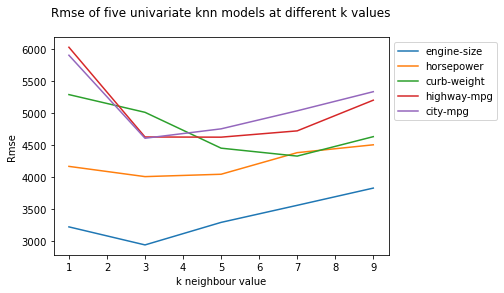

In [24]:
k_values = [k for k in range(1, 11, 2)]
### Looping over the first five features in order to calculate the RMSE for a certain k-value
for var in top5_var : 
    ### Creating an empy list to store the results
    k_rmse = list()
    ### Looping over every k in k-value list to calculate the rmse for a given variable in top5_var list 
    for k in k_values:
        ### Training the model 
        rmse = knn_train_test(train_col_name = var, target_col_name = 'price', df = numeric_cars, k_value = k) 
        ### Storing the results
        k_rmse.append(rmse)
    
    ### Plotting the results
    plt.plot(k_values, k_rmse, label = var)
    
### Adding title, labels and legend    
plt.title("Rmse of five univariate knn models at different k values\n")
plt.xlabel("k neighbour value")
plt.ylabel("Rmse")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Our goal is to have the lowest RMSE. It seems like the best k-value for our features is k = 3, except for "curb-weight" for which the lowest RMSE is obtained with k = 7.

# 3.2. Multivariate k-nearest neighbors model

Lets try the same model with many variables (multivariate). <br>
We have to modify our knn_train_test function so as it can accept a list of columns instead of just one column.

In [31]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

rmse_results_k = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results_k[col] = rmse_val

rmse_results_k

{'normalized-losses': {1: 7779.606037519503,
  3: 7480.692360872743,
  5: 7337.2848203845515,
  7: 7795.000930504562,
  9: 7705.82454665913},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.490335934409,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4577.003915399697,
  3: 5087.460276710444,
  5: 5429.644739577333,
  7: 5307.702178308323,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.421075087697,
  5: 4772.510209128695,
  7: 4715.979827895643,
  9: 4736.091903473983},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'engine-size': {1: 3227.659787364569,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  9: 3831.764970642862},
 'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 67

In [32]:
### Calculating the average RMSE for each feature with different "k" values
feature_avg_rmse = {}
for k,v in rmse_results_k.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3373.460278
horsepower           4223.530357
width                4678.052063
curb-weight          4743.330761
highway-mpg          5040.509230
city-mpg             5126.515991
length               5156.973125
wheel-base           5252.436179
compression-rate     7164.249800
bore                 7213.387243
normalized-losses    7619.681739
stroke               7993.732370
peak-rpm             8078.822375
height               8159.606698
dtype: float64


In [33]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    ### Dividing the dataset into two part : train set and test set
    train_df = randomized_df.iloc[0:(int(len(randomized_df)/2))]
    test_df = randomized_df.iloc[(int(len(randomized_df)/2)):]
    
    
    k_values = [5]
    rmses_k = {} 
    for k in k_values:
        ### Fitting a K-nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        ### Making predictions with the model
        predicted_labels = knn.predict(test_df[train_cols])

        ### Calculating the RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
         ### Storing the RMSE values into the rmses_k dictionnary
        rmses_k[k] = rmse
        
        ### Returning the RMSE
    return rmses_k

In [34]:
rmse_results_k = {}

for nr_best_feats in range(2,7):
    rmse_results_k['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

rmse_results_k

{'2 best features': {5: 2938.1306900277887},
 '3 best features': {5: 3576.5381752208214},
 '4 best features': {5: 3435.145837075945},
 '5 best features': {5: 3457.4725012114936},
 '6 best features': {5: 3415.73077323836}}

# 3.3 Hyperparameter Tuning

In [35]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    ### Dividing the dataset into two part : train set and test set
    train_df = randomized_df.iloc[0:(int(len(randomized_df)/2))]
    test_df = randomized_df.iloc[(int(len(randomized_df)/2)):]
    
    k_values = [i for i in range(1, 25)]
    rmses_k = {} 
    for k in k_values:
        ### Fitting a K-nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        ### Making predictions with the model
        predicted_labels = knn.predict(test_df[train_cols])

        ### Calculating the RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
         ### Storing the RMSE values into the rmses_k dictionnary
        rmses_k[k] = rmse
        
        ### Returning the RMSE
    return rmses_k

In [36]:
rmses_results_k = {}

for nr_best_feats in range(2,6):
    rmses_results_k['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

rmses_results_k
    

{'2 best features': {1: 2824.8287076781794,
  2: 2615.442453055988,
  3: 2676.6521480521455,
  4: 2831.7841198370656,
  5: 2938.1306900277887,
  6: 3128.516968715745,
  7: 3204.0554389097565,
  8: 3459.8826047221833,
  9: 3715.847780310613,
  10: 3980.307424292901,
  11: 4151.348212046468,
  12: 4231.233582321214,
  13: 4321.751665703992,
  14: 4366.489859575597,
  15: 4487.120412964203,
  16: 4591.609216968047,
  17: 4683.284404125849,
  18: 4739.084337496269,
  19: 4784.099214347852,
  20: 4777.706746763483,
  21: 4816.3918959481325,
  22: 4806.480777296786,
  23: 4832.819314595003,
  24: 4883.724636768665},
 '3 best features': {1: 3384.9422637192606,
  2: 3261.939437825234,
  3: 3142.577321948092,
  4: 3306.01101075266,
  5: 3576.5381752208214,
  6: 3709.4813226235947,
  7: 3610.411169953427,
  8: 3694.9374649086276,
  9: 3848.9692035290686,
  10: 3973.5807329145964,
  11: 4098.883214686969,
  12: 4217.8064717212055,
  13: 4298.670431349281,
  14: 4313.880284852934,
  15: 4276.18876

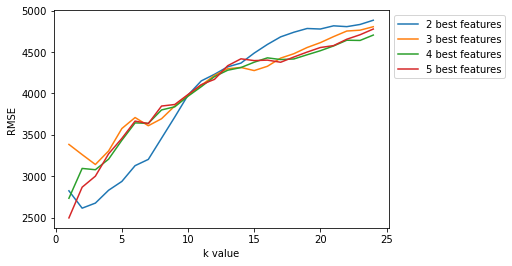

In [37]:
### Lets visualize the results
for k, v in rmses_results_k.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [39]:
for model, k_dict in rmses_results_k.items():
    
    k = min(k_dict, key = k_dict.get)
    
    min_rmse = k_dict[k]
    
    print("The optimal k value for the {} multivariate model is {} with a rmse = {}"
         .format(model, k, min_rmse))

The optimal k value for the 2 best features multivariate model is 2 with a rmse = 2615.442453055988
The optimal k value for the 3 best features multivariate model is 3 with a rmse = 3142.577321948092
The optimal k value for the 4 best features multivariate model is 1 with a rmse = 2734.943456978825
The optimal k value for the 5 best features multivariate model is 1 with a rmse = 2497.7039476088817


## CONCLUSION

- According to this test/train validation model we could find out the features (variates) with the lowest RMSE and their optimal k neighbour values, runnig univariate models for each one.
- We could reduce later the RMSE of the models using a multivariate models, with the best features discovered before. And we saw the best combination (with the lowest RMSE) between number of variates and k neighbour values for our posible models.
- However this test/train model has an important disavantage due to the high bias we can generate choosing only a part of our data for training the model.
- For solving in part this problem we could chosee a k fold cross validation model instead, which will use all our data for train and test.
- This manner we also will be able to calculate standard deviations of RMSE for our models. So we will have more information about the variabilily of our models predicted values and another criterion for selecting the best one.

#### Thank you for reading.